```
Nama : Kiky Napitupulu

Email : kikynapitupulu687@gmail.com

Domisili Asal : Porsea, Toba Samosir, Sumatera Utara
```

In [1]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Prepare Dataset
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-12-02 06:44:08--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  9.12MB/s    in 35s     

2020-12-02 06:44:44 (8.71 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# import library
import zipfile
import os

# melakukan ekstraksi dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
# mendefinisikan nama direktori dataset
base_dir = '/tmp/rockpaperscissors'
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
# Pembuatan direktori dengan objek image data generator
os.mkdir(train_dir)
os.mkdir(validation_dir)
train_rock = os.path.join(train_dir, 'rock')
os.mkdir(train_rock)
train_paper = os.path.join(train_dir, 'paper')
os.mkdir(train_paper)
train_scissors = os.path.join(train_dir, 'scissors')
os.mkdir(train_scissors)
val_rock = os.path.join(validation_dir, 'rock')
os.mkdir(val_rock)
val_paper = os.path.join(validation_dir, 'paper')
os.mkdir(val_paper)
val_scissors = os.path.join(validation_dir, 'scissors')
os.mkdir(val_scissors)

In [6]:
# Membagi data train dan validation set
from sklearn.model_selection import train_test_split

train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.40)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.40)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.40)

In [7]:
# Menyalin dataset ke sebuah file
import shutil

for file in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(train_rock, file))
for file in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(train_paper,file))
for file in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(train_scissors,file))
for file in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, file), os.path.join(val_rock,file))
for file in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,file), os.path.join(val_paper,file))
for file in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,file), os.path.join(val_scissors,file))

In [8]:
# import library dan augmentasi gambar pada setiap sampel dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
)
test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    vertical_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)

In [9]:
# Mempersiapkan data latih 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size= 4,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150,150),
    batch_size = 4,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [10]:
# Membangun arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [11]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=41,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=27,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
41/41 - 10s - loss: 0.6523 - accuracy: 0.3415 - val_loss: 0.6369 - val_accuracy: 0.3148
Epoch 2/20
41/41 - 10s - loss: 0.6370 - accuracy: 0.3171 - val_loss: 0.6399 - val_accuracy: 0.2685
Epoch 3/20
41/41 - 10s - loss: 0.6369 - accuracy: 0.3354 - val_loss: 0.6290 - val_accuracy: 0.4630
Epoch 4/20
41/41 - 10s - loss: 0.6457 - accuracy: 0.3598 - val_loss: 0.6276 - val_accuracy: 0.3333
Epoch 5/20
41/41 - 10s - loss: 0.5890 - accuracy: 0.4573 - val_loss: 0.4973 - val_accuracy: 0.6296
Epoch 6/20
41/41 - 10s - loss: 0.4241 - accuracy: 0.7195 - val_loss: 0.4454 - val_accuracy: 0.6944
Epoch 7/20
41/41 - 10s - loss: 0.2555 - accuracy: 0.8354 - val_loss: 0.3700 - val_accuracy: 0.8333
Epoch 8/20
41/41 - 11s - loss: 0.3187 - accuracy: 0.8293 - val_loss: 0.2915 - val_accuracy: 0.8241
Epoch 9/20
41/41 - 10s - loss: 0.2648 - accuracy: 0.8598 - val_loss: 0.2456 - val_accuracy: 0.8889
Epoch 10/20
41/41 - 10s - loss: 0.2214 - accuracy: 0.8780 - val_loss: 0.3956 - val_accuracy: 0.8333
Epoch 11/

Saving 4burI8a7jyfTRBl6.png to 4burI8a7jyfTRBl6.png
4burI8a7jyfTRBl6.png
scissors


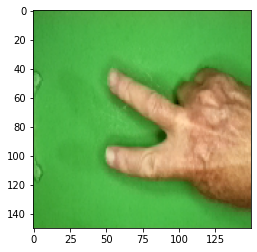

In [12]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0,1]!=0:
    print('rock')
  elif classes[0,0]!=0:
    print('paper')
  else:
    print('scissors')